# 데이터의 전처리


In [ ]:
#데이터의전처리, NaN, 연령에 대한 오차범위 결측치 
#중복데이터, 관련없는 데이터, 구조적문제 수정, NA  표기, 이상치, 누락 데이터 


# 데이터 통합

In [ ]:
#동일한 데이터를 통합
#두 데이터간의 차이를 확인하기

# 데이터 변환

In [ ]:
#분석이 불가능하거나 어려운 형태를 분석 가능한 형태로 변환할 수 있다.
#단위 변환
#파싱
#형태 변환

# 데이터 축소

In [ ]:
#분석이 불가능해서, 데이터를 저차원, 저용량으로 축소
#차원 축소, 데이터 클러스터링
#연속형 데이터를 범주형 데이터로 변경
#기계학습에서 사용하기 위해
#차이가 큰 값 사이의 가중치 부여, 적은 값의 연관관계 부여

# 표준화, 정규화

In [ ]:
#데이터의 분포에 따른 특성 제거, 통계를 위한 반환
#표준화는 정규분포의 속성을 갖도록
#정규화는 데이터의 분포가 유지가된다., 데이터 범위의 제한이 생긴다

# 부동산 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import pop

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='ignore')

In [13]:
df = pd.read_csv('C:/Users/user/dohyeon/한국자산관리공사_국유부동산 매각현황_20221231.csv', encoding = 'cp949')
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


# 필수과제
## 1. 매각 금액이 가장 많은 팀과 하위 팀의 차이 확인하기

## 2. 연도별 매각금액 추이 확인하기

## 3. 상위 5개 지역별 매각 면적 확인하기

## 4. 계약 일자 정보 기준으로, 매각이 많은 때의 특징 알아보기


In [14]:
df.head()

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141317 entries, 0 to 141316
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   연도구분        141317 non-null  int64  
 1   지역구분        141317 non-null  object 
 2   소재지명        141317 non-null  object 
 3   재산구분        141317 non-null  object 
 4   공부지목        141316 non-null  object 
 5   대장면적(제곱미터)  141317 non-null  float64
 6   대장금액(원)     141317 non-null  float64
 7   처분구분명       141317 non-null  object 
 8   계약일자        141317 non-null  object 
 9   부점명         141317 non-null  object 
 10  팀명          141232 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 11.9+ MB


In [16]:
df.isnull().sum()

연도구분           0
지역구분           0
소재지명           0
재산구분           0
공부지목           1
대장면적(제곱미터)     0
대장금액(원)        0
처분구분명          0
계약일자           0
부점명            0
팀명            85
dtype: int64

In [17]:
df = df.dropna(axis=0)

In [18]:
df = df.dropna(axis=1)
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, '국유재산관리1팀'),
  Text(1, 0, '국유울산팀'),
  Text(2, 0, '국유재산관리2팀'),
  Text(3, 0, '국유춘천팀'),
  Text(4, 0, '국유목포팀'),
  Text(5, 0, '국유여수팀'),
  Text(6, 0, '국유제주팀'),
  Text(7, 0, '국유팀'),
  Text(8, 0, '국유광주2팀'),
  Text(9, 0, '국유원주팀'),
  Text(10, 0, '국유진주팀'),
  Text(11, 0, '내포지부'),
  Text(12, 0, '국유재산관리팀'),
  Text(13, 0, '국유 충주팀'),
  Text(14, 0, '재산관리3팀'),
  Text(15, 0, '국유군산팀'),
  Text(16, 0, '국유재산관리3팀'),
  Text(17, 0, '국유 안동팀'),
  Text(18, 0, '국유 포항팀'),
  Text(19, 0, '의정부팀'),
  Text(20, 0, '재산관리2팀'),
  Text(21, 0, '국유광주1팀'),
  Text(22, 0, '국유평택팀'),
  Text(23, 0, '재산관리1팀'),
  Text(24, 0, '재산관리5팀'),
  Text(25, 0, '국유통영팀'),
  Text(26, 0, '재산관리4팀'),
  Text(27, 0, '재산관리6팀'),
  Text(28, 0, '팀미정'),


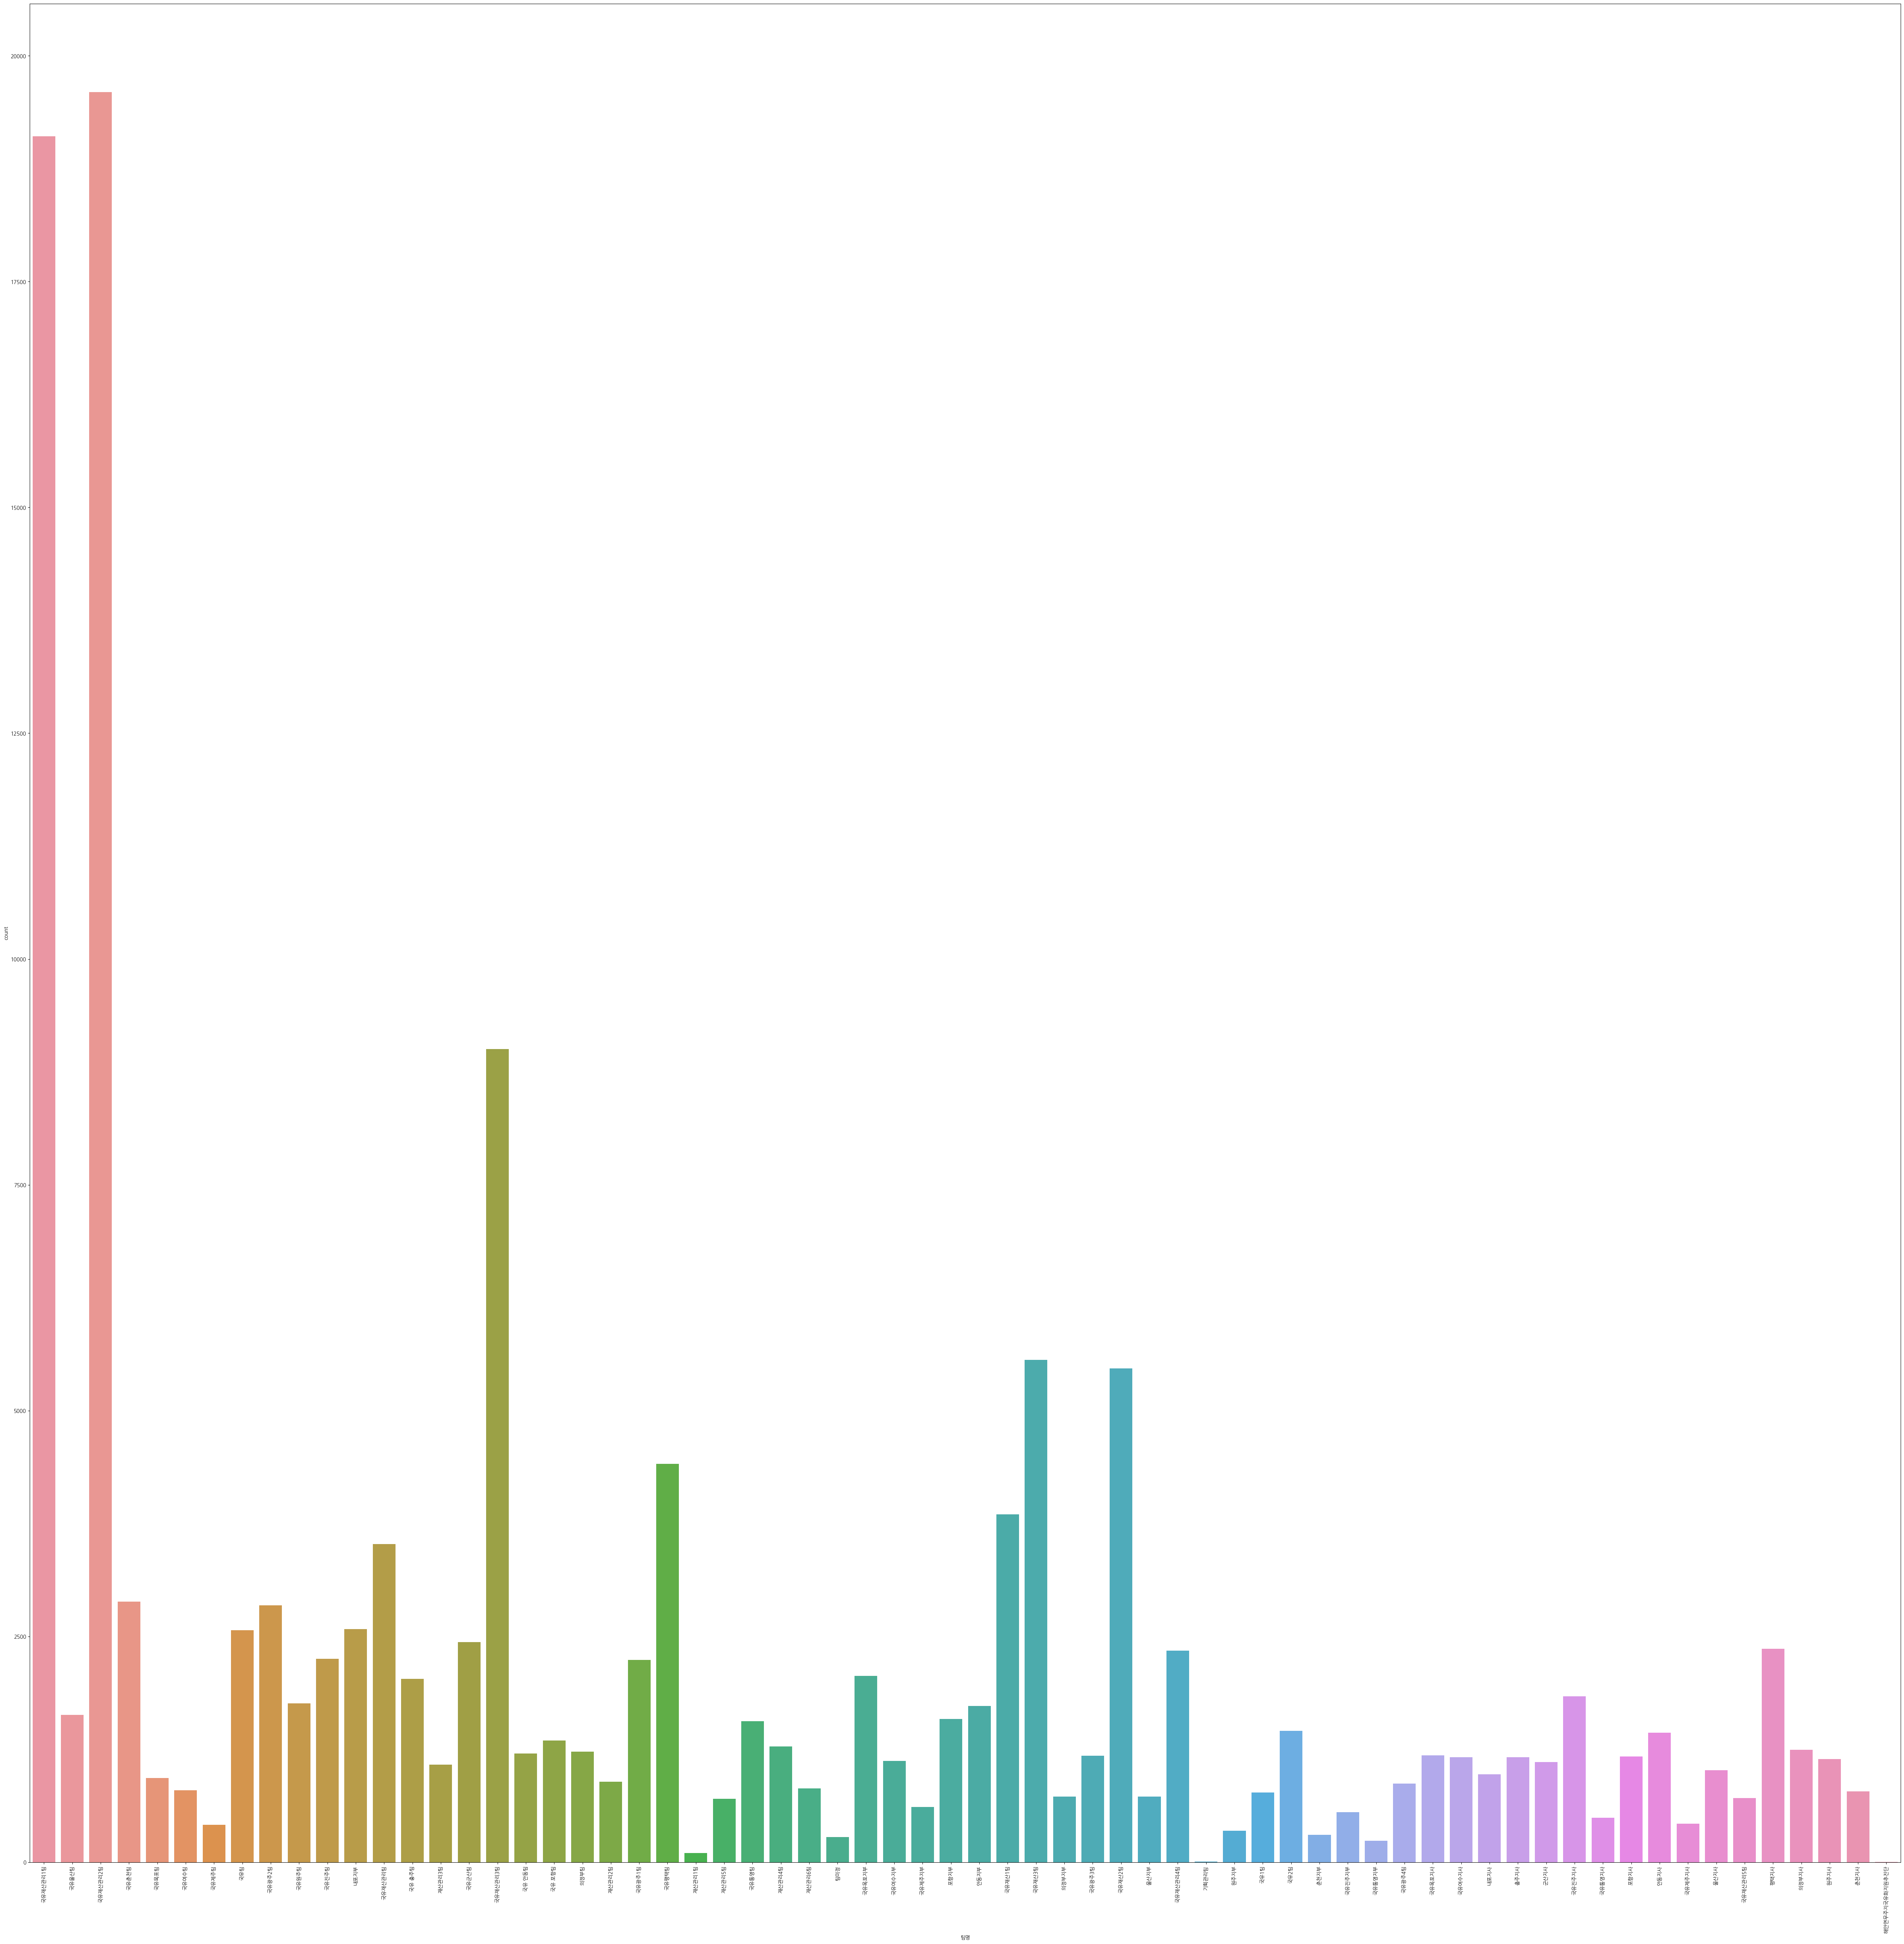

In [63]:
plt.figure(figsize=(65,65))
sns.countplot(data=df, x='팀명')
plt.xticks(rotation=90)
#팀별 매각 건수를 확인해보니
#국유재산관리 1,2,3팀 그리고 국유재산팀들이 전반적으로 매각수량이 많다.

In [68]:
max_sale_team = df[df['대장금액(원)'] == df['대장금액(원)'].max()]
min_sale_team = df[df['대장금액(원)'] == df['대장금액(원)'].min()]
difference = max_sale_team['대장금액(원)'].values[0] - min_sale_team['대장금액(원)'].values[0]
max_sale_team

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명,연도
118423,2021,서울특별시,서울특별시 송파구 잠실동 10,토지,체육용지,80627.0,3.670000e+11,처분(매각수의),2021-07-01,서울동부지역본부,국유재산3팀,2021


In [27]:
min_sale_team

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
2685,2014,충청북도,충청북도 충주시 중앙탑면 용전리 291-3,토지,답,0.0,0.0,처분(매각수의),2014-03-05,충북지역본부,국유 충주팀
4402,2014,경상남도,경상남도 통영시 도산면 수월리 599-2,토지,잡종지,0.0,0.0,처분(매각수의),2014-04-14,경남지역본부,국유통영팀
4907,2014,경상남도,경상남도 통영시 용남면 장평리 25-5,토지,잡종지,0.0,0.0,처분(매각수의),2014-04-24,경남지역본부,국유통영팀
5167,2014,대전광역시,대전광역시 동구 인동 242-19,토지,대,0.0,0.0,처분(매각수의),2014-04-29,대전충남지역본부,국유재산관리2팀
5182,2014,부산광역시,부산광역시 사하구 감천동 산 99-42,토지,임야,0.0,0.0,처분(매각수의),2014-04-29,국유재산관리부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
37869,2016,전라남도,전라남도 장성군 황룡면 신호리 227-1,토지,대,0.0,0.0,처분(매각수의),2016-03-03,광주전남지역본부,국유광주1팀
37870,2016,전라남도,전라남도 장성군 황룡면 신호리 228-1,토지,대,0.0,0.0,처분(매각수의),2016-03-03,광주전남지역본부,국유광주1팀
42071,2016,강원도,강원도 강릉시 구정면 제비리 1064-2,토지,전,0.0,0.0,처분(매각수의),2016-04-21,강원지역본부,국유팀
42131,2016,강원도,강원도 태백시 혈동 260-70,토지,전,0.0,0.0,처분(매각수의),2016-03-30,강원지역본부,국유팀


In [72]:
df['재산구분'].value_counts()

토지    140166
건물      1065
Name: 재산구분, dtype: int64

In [28]:
difference

367000000000.0

In [29]:
print("매각 금액이 가장 많은 팀명:", max_sale_team['팀명'].values[0])
print("매각 금액이 가장 적은 팀명:", min_sale_team['팀명'].values[0])

매각 금액이 가장 많은 팀: 국유재산3팀
매각 금액이 가장 적은 팀: 국유 충주팀


In [31]:
df['계약일자'] = pd.to_datetime(df['계약일자'])
df['연도'] = df['계약일자'].dt.year
yearly_sales = df.groupby('연도')['대장금액(원)'].sum()

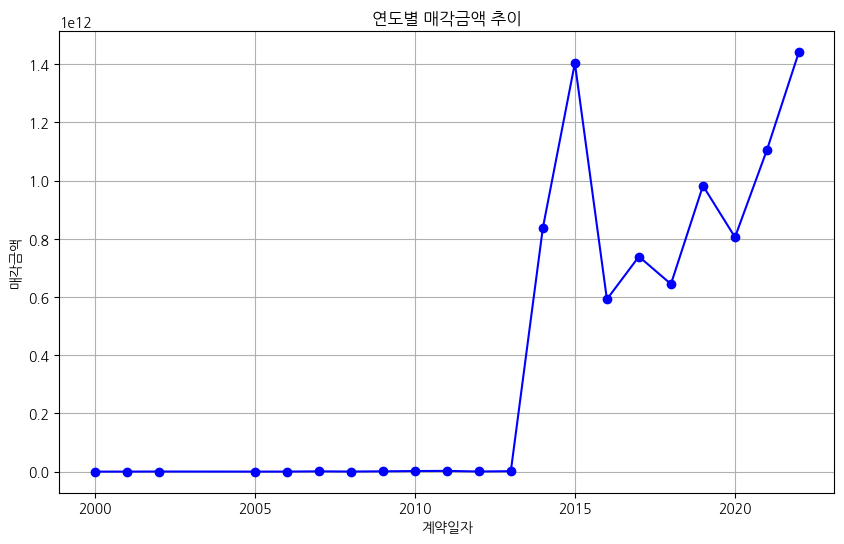

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='b')
plt.title('연도별 매각금액 추이')
plt.xlabel('계약일자')
plt.ylabel('매각금액')
plt.grid(True)
#plt.ylim([0, 370000000000.0])  
plt.show()

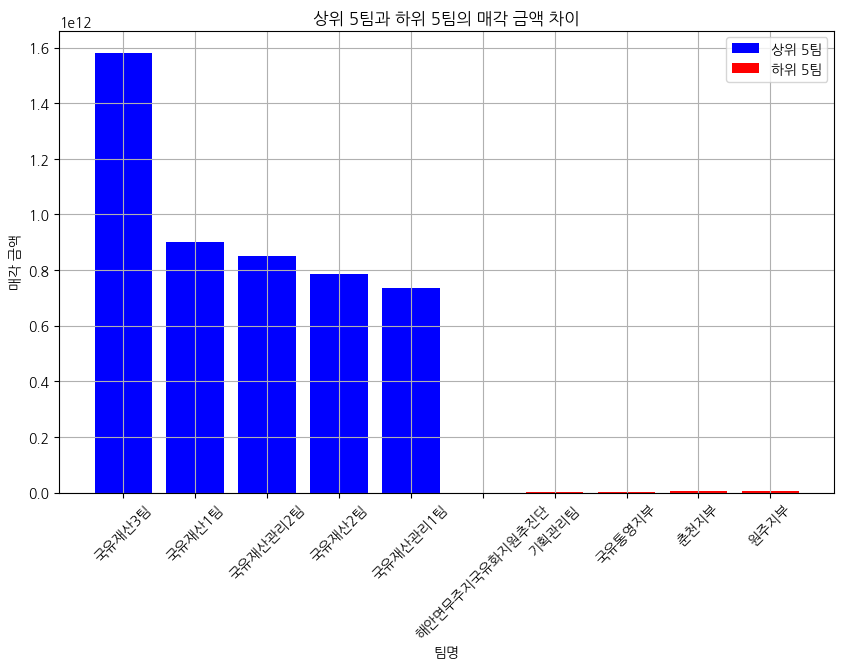

In [70]:
team_sales = df.groupby('팀명')['대장금액(원)'].sum()

# 매각 금액 상위 5개 팀과 하위 5개 팀 추출
top5_teams = team_sales.nlargest(5)
bottom5_teams = team_sales.nsmallest(5)

# 차이 계산
difference = top5_teams.sum() - bottom5_teams.sum()

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(top5_teams.index, top5_teams.values, label='상위 5팀', color='blue')
plt.bar(bottom5_teams.index, bottom5_teams.values, label='하위 5팀', color='red')
plt.title('상위 5팀과 하위 5팀의 매각 금액 차이')
plt.xlabel('팀명')
plt.ylabel('매각 금액')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [36]:
top5_areas = df.groupby('지역구분')['대장면적(제곱미터)'].sum().nlargest(5)

print("상위 5개 지역별 매각 면적:")
print(top5_areas)

#강원도가 제일 많고, 경기도, 전라도, 충청남도, 경북 이렇게 순위가 매겨졌다.
#grouby로 그룹화 해주고, sum을 통해 가장 높은 상위 매각면적의 지역들이 나타남

상위 5개 지역별 매각 면적:
지역구분
강원도     1.335528e+07
경기도     1.119931e+07
전라남도    9.388421e+06
충청남도    8.580610e+06
경상북도    7.053823e+06
Name: 대장면적(제곱미터), dtype: float64


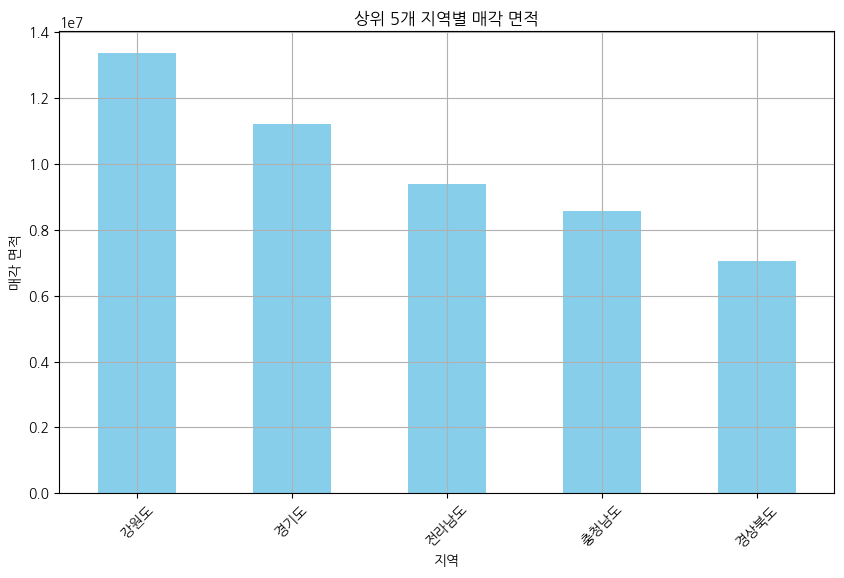

In [71]:
plt.figure(figsize=(10, 6))
top5_areas.plot(kind='bar', color='skyblue')
plt.title('상위 5개 지역별 매각 면적')
plt.xlabel('지역')
plt.ylabel('매각 면적')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [38]:
df['처분구분명'].value_counts()

처분(매각수의)      124517
처분(매각입찰)        8832
처분(무상관리전환)      4289
처분(사용승인)        2086
처분(무상귀속)         706
처분(무상양여)         686
처분(유상관리전환)       114
처분(유상양여)           1
Name: 처분구분명, dtype: int64

In [40]:
df['처분구분명'].value_counts(normalize=True)
#처분된 토지는 88%, 매각입찰이 된 토지는 6%. 무상관리전환의 토지가 3%
#토지는 88%가 매각됨을 알 수 있다.

처분(매각수의)      0.881655
처분(매각입찰)      0.062536
처분(무상관리전환)    0.030369
처분(사용승인)      0.014770
처분(무상귀속)      0.004999
처분(무상양여)      0.004857
처분(유상관리전환)    0.000807
처분(유상양여)      0.000007
Name: 처분구분명, dtype: float64

In [54]:
monthly_sales = df.groupby(df['계약일자'].dt.strftime('%Y-%m'))['대장금액(원)'].sum()
monthly_sales

계약일자
2000-04    7.897136e+07
2001-12    1.099950e+08
2002-05    3.585670e+08
2005-09    8.517288e+07
2005-10    1.528099e+07
               ...     
2022-08    2.216662e+11
2022-09    1.163609e+11
2022-10    1.029569e+11
2022-11    6.278943e+10
2022-12    1.168044e+11
Name: 대장금액(원), Length: 156, dtype: float64

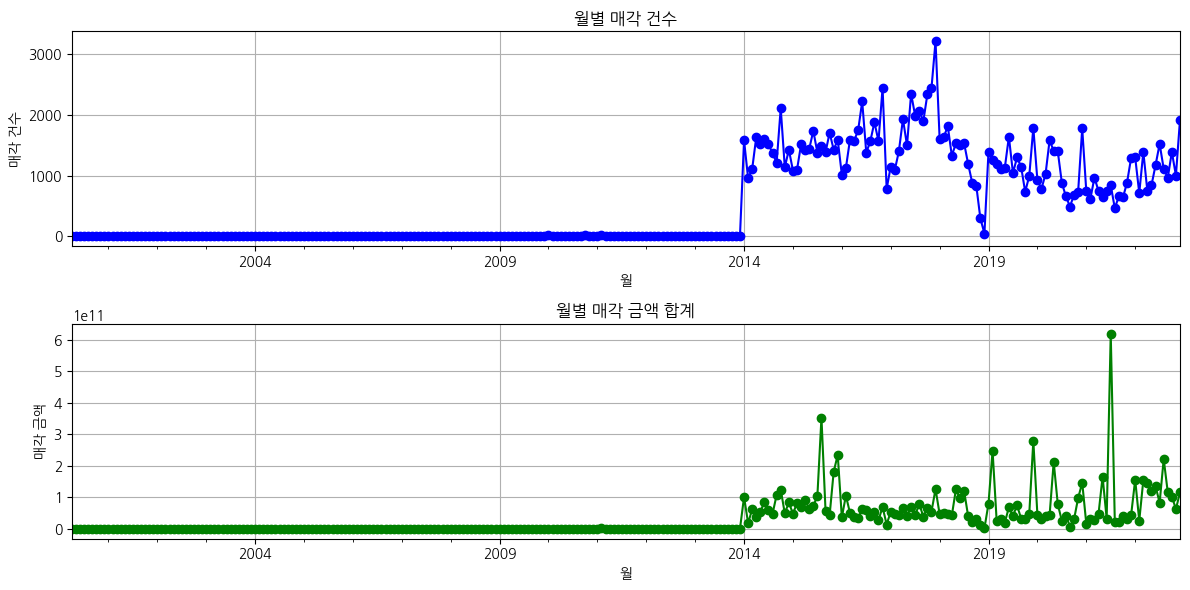

In [74]:
df['계약일자'] = pd.to_datetime(df['계약일자'])

# 월별 매각 건수 계산
monthly_count = df.resample('M', on='계약일자')['대장금액(원)'].count()
#시간간격조정해서 계약일자에서 M별로 다시 리샘플링
# 월별 매각 금액 합계 계산
monthly_sales = df.resample('M', on='계약일자')['대장금액(원)'].sum()

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
monthly_count.plot(kind='line', marker='o', color='blue')
plt.title('월별 매각 건수')
plt.xlabel('월')
plt.ylabel('매각 건수')
plt.grid(True)

plt.subplot(2, 1, 2)
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('월별 매각 금액 합계')
plt.xlabel('월')
plt.ylabel('매각 금액')
plt.grid(True)

plt.tight_layout()
plt.show()

계약일자
2000-04-30    7.897136e+07
2000-05-31    0.000000e+00
2000-06-30    0.000000e+00
2000-07-31    0.000000e+00
2000-08-31    0.000000e+00
                  ...     
2022-08-31    2.216662e+11
2022-09-30    1.163609e+11
2022-10-31    1.029569e+11
2022-11-30    6.278943e+10
2022-12-31    1.168044e+11
Freq: M, Name: 대장금액(원), Length: 273, dtype: float64

7.897136e+07    1
2.021152e+09    1
1.255985e+11    1
9.687391e+10    1
1.214279e+11    1
               ..
5.461897e+10    1
8.571729e+10    1
6.104788e+10    1
4.857362e+10    1
1.168044e+11    1
Name: 대장금액(원), Length: 156, dtype: int64

In [56]:
max_month = monthly_sales.idxmax()
min_month = monthly_sales.idxmin()
max_month_sales = monthly_sales.max()
min_month_sales = monthly_sales.min()

print("매각이 가장 많은 월:", max_month)
print("매각이 가장 적은 월:", min_month)
print("가장 많은 매각 금액:", max_month_sales)
print("가장 적은 매각 금액:", min_month_sales)

매각이 가장 많은 월: 2021-07
매각이 가장 적은 월: 2006-09
가장 많은 매각 금액: 619889845435.0
가장 적은 매각 금액: 1200000.0


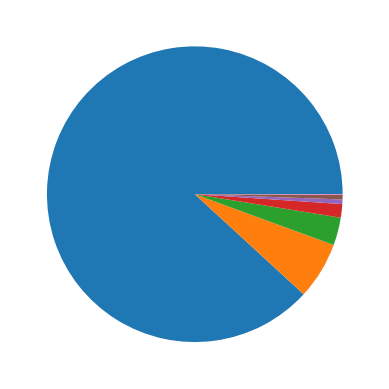

In [44]:
plt.pie(df['처분구분명'].value_counts(normalize=True))
plt.show()

<Axes: ylabel='처분구분명'>

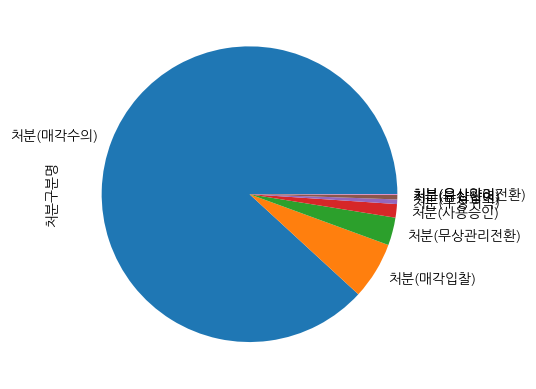

In [45]:
df['처분구분명'].value_counts().plot(kind='pie')

In [2]:
import pandas as pd
import numpy as np
import pop

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('C:/Users/user/dohyeon/한국자산관리공사_국유부동산 매각현황_20221231.csv', encoding = 'cp949')
df

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
0,2014,전라북도,전라북도 정읍시 상동 725,토지,전,56.0,9968000.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
1,2014,울산광역시,울산광역시 북구 천곡동 709-1,토지,임야,225.0,13770000.0,처분(매각수의),2014-01-01,국유재산관리부,국유울산팀
2,2014,전라북도,전라북도 정읍시 산내면 종성리 727-21,토지,답,105.0,1075200.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
3,2014,전라북도,전라북도 정읍시 산내면 종성리 727-16,토지,답,184.0,1884160.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리1팀
4,2014,전라북도,전라북도 김제시 검산동 424-3,토지,전,2106.0,23797800.0,처분(매각수의),2014-01-01,전북지역본부,국유재산관리2팀
...,...,...,...,...,...,...,...,...,...,...,...
141312,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 하천리 1500-4,토지,임야,208.0,29952000.0,처분(매각수의),2022-11-09,광주전남지역본부,국유제주지사
141313,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-3,토지,전,1257.0,56062200.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141314,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 세화리 2451-10,토지,전,2974.0,132640400.0,처분(매각수의),2022-12-29,광주전남지역본부,국유제주지사
141315,2022,제주특별자치도,제주특별자치도 서귀포시 표선면 토산리 32-3,토지,유지,80.0,32160000.0,처분(매각수의),2022-08-04,광주전남지역본부,국유제주지사


In [4]:
df['공부지목'].value_counts()

대        36882
전        26093
도로       17437
답        16540
구거        9729
임야        9141
잡종지       7631
목장용지      4661
하천        3050
공장용지      2019
묘지        1249
확인불가      1066
과수원        758
학교용지       747
제방         631
체육용지       557
유지         512
철도용지       507
창고용지       411
수도용지       380
종교용지       314
주차장        278
공원         247
양어장        163
유원지        120
주유소용지      118
사적지         45
염전          28
광천지          2
Name: 공부지목, dtype: int64

In [12]:
df2 = df[df['공부지목'] == '대']
df2

,연도구분,지역구분,소재지명,재산구분,공부지목,대장면적(제곱미터),대장금액(원),처분구분명,계약일자,부점명,팀명
10,2014,부산광역시,부산광역시 동구 초량동 1076-7,토지,대,19.0,38208000.0,처분(매각수의),2014-01-02,국유재산관리부,국유재산관리1팀
14,2014,경상북도,경상북도 청도군 청도읍 고수리 207-19,토지,대,64.0,9580710.0,처분(매각수의),2014-01-02,대구경북지역본부,국유재산관리2팀
18,2014,강원도,강원도 강릉시 교동 907-34,토지,대,76.0,18088000.0,처분(매각수의),2014-01-02,강원지역본부,국유팀
21,2014,전라남도,전라남도 곡성군 곡성읍 읍내리 846-15,토지,대,45.0,7740000.0,처분(매각수의),2014-01-02,광주전남지역본부,국유광주2팀
23,2014,전라북도,전라북도 정읍시 산내면 종성리 835-43,토지,대,96.0,778560.0,처분(매각수의),2014-01-02,전북지역본부,국유재산관리1팀
...,...,...,...,...,...,...,...,...,...,...,...
141289,2022,제주특별자치도,제주특별자치도 서귀포시 남원읍 수망리 246-3,토지,대,9.0,3223980.0,처분(매각수의),2022-07-12,광주전남지역본부,국유제주지사
141292,2022,제주특별자치도,제주특별자치도 서귀포시 남원읍 위미리 4591-100,토지,대,48.0,2816640.0,처분(매각수의),2022-01-25,광주전남지역본부,국유제주지사
141295,2022,제주특별자치도,제주특별자치도 서귀포시 성산읍 성산리 399-120,토지,대,34.0,69020000.0,처분(매각수의),2022-09-13,광주전남지역본부,국유제주지사
141297,2022,제주특별자치도,제주특별자치도 서귀포시 성산읍 성산리 400-21,토지,대,266.0,534660000.0,처분(매각수의),2022-09-13,광주전남지역본부,국유제주지사
